# **Deep learning entry task**
 <img src="https://www.tu-braunschweig.de/typo3conf/ext/tu_braunschweig/Resources/Public/Images/Logos/tu_braunschweig_logo.svg" align="right" width="200px"/>

[Institute of Geodesy and Photogrammetry](https://www.tu-braunschweig.de/en/igp),  
[The Technical University of Braunschweig  ](https://www.tu-braunschweig.de/en/)  
Instructors: [Dr. -Ing. Mehdi Maboudi](https://www.tu-braunschweig.de/en/igp/staff/mehdi-maboudi) and [Dr. Pedro Achanccaray](https://www.tu-braunschweig.de/en/igp/staff/pedro-diaz)
<br clear="left"/>

The purpose of this entry task is to measure your **knowledge of machine learning and artificial neural network concepts**. You should be familiar with these topics for **better understanding and comprehension** of the deep learning course.


For this reason, the entry task should be solved **without using any artificial intelligence tools** (ChatGPT, Copilot, among others). You can only use them to assist you in **debugging** your code.

# **1. Import all necessary packages**

In [1]:
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

# **2. Load the Fashion MNIST dataset for image classification**

In [2]:
# Fixing randomness by setting seeds
random_seed = 42
np.random.seed(random_seed)
tf.random.set_seed(random_seed)
random.seed(random_seed)

In [3]:
# Load Fashion MNIST dataset
df = tf.keras.datasets.fashion_mnist

In [4]:
(x_train, y_train), (x_test, y_test) = df.load_data()

In [5]:
# Normalising the dataset.
x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:
# Convert labels to integers
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [7]:
# Printing out some information
print("Training Images Shape:", x_train.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Images Shape:", x_test.shape)
print("Testing Labels Shape:", y_test.shape)

Training Images Shape: (60000, 28, 28)
Training Labels Shape: (60000,)
Testing Images Shape: (10000, 28, 28)
Testing Labels Shape: (10000,)


In [8]:
# Concatenate the training and testing datasets
x_full = np.concatenate((x_train, x_test))
y_full = np.concatenate((y_train, y_test))

In [9]:
x_full

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

Here we can see the shape of the dataset, where there is 70,000 images with 28 x 28 pixels

In [10]:
#Shuffling the columns
def shuffle_pixels(df):
  # Get a random permutation of the column indices
  shuffled_indices =  np.random.RandomState(42).permutation(len(df.columns)) #Fixing Randonmess
  # Reorder the dataframe based on the shuffled indices
  return df[df.columns[shuffled_indices]]

'\n\nimages_shuffled = shuffle_pixels(images_data)\nimages_shuffled\nnum_columns = x_train.shape[1]\nshuffled_indices = np.random.RandomState(42).permutation(num_columns)\nx_train_shuffled = x_train[:, shuffled_indices]\nx_test_shuffled = x_test[:, shuffled_indices]\n'

In [11]:
# Splitting the dataset into train (80%), validation (10%) and test (10%) without shuffling the input features
x_train, x_test, y_train, y_test = train_test_split(x_full,
                                                  y_full,
                                                  test_size=0.1,
                                                  random_state=random_seed,
                                                  stratify=y_full)
x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                  y_train,
                                                  test_size=0.1,
                                                  random_state=random_seed,
                                                  stratify=y_train)


# Splitting the dataset into train (80%), validation (10%) and test (10%) with shuffling the input features
x_train_shuffled, x_test_shuffled, y_train_shuffled, y_test_shuffled = train_test_split(x_full,
                                                  y_full,
                                                  test_size=0.1,
                                                  random_state=random_seed,
                                                  stratify=y_full)
x_train_shuffled, x_val_shuffled, y_train_shuffled, y_val_shuffled = train_test_split(x_train_shuffled,
                                                  y_train_shuffled,
                                                  test_size=0.1,
                                                  random_state=random_seed,
                                                  stratify=y_train_shuffled)

In [12]:
# Define MLP architecture
def get_model(hidden_layers, n_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),              # Input layer: Flatten 28x28 images
        tf.keras.layers.Dense(512, activation='relu'),             # Hidden layer 1: 512 neurons, ReLU activation
        tf.keras.layers.Dense(256, activation='relu'),             # Hidden layer 2: 256 neurons, ReLU activation
        tf.keras.layers.Dense(128, activation='relu'),             # Hidden layer 3: 128 neurons, ReLU activation
        tf.keras.layers.Dense(10, activation='softmax')            # Output layer: 10 neurons for 10 classes
     ])
    return model

In [13]:
# Training the model three times with fixed learning rate and three epochs each time - shuffled features

hidden_layers = [64,128]
n_classes = 10
histories_shuffled = []

for _ in range(3):
    model_shuffled = get_model(hidden_layers=hidden_layers,
                      n_classes=n_classes)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model_shuffled.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model_shuffled.fit(x_train_shuffled, y_train_shuffled, epochs=3, validation_data=(x_val_shuffled, y_val_shuffled), verbose=1)
    histories_shuffled.append(history)

C:\Users\Disha\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.7879 - loss: 0.6053 - val_accuracy: 0.8484 - val_loss: 0.3941
Epoch 2/3
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8610 - loss: 0.3795 - val_accuracy: 0.8614 - val_loss: 0.3706
Epoch 3/3
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8767 - loss: 0.3345 - val_accuracy: 0.8733 - val_loss: 0.3447
Epoch 1/3
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.7842 - loss: 0.6048 - val_accuracy: 0.8621 - val_loss: 0.3675
Epoch 2/3
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8603 - loss: 0.3769 - val_accuracy: 0.8694 - val_loss: 0.3494
Epoch 3/3
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8789 - loss: 0.3307 - val_accuracy: 0.8713 - val_loss: 0.3414
Epoch 1/3
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.7842 - loss: 0.6058 - val_accuracy: 0.8549 - val_loss: 0.3860
Epoch 2/3
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8599 - loss: 0.3774 -

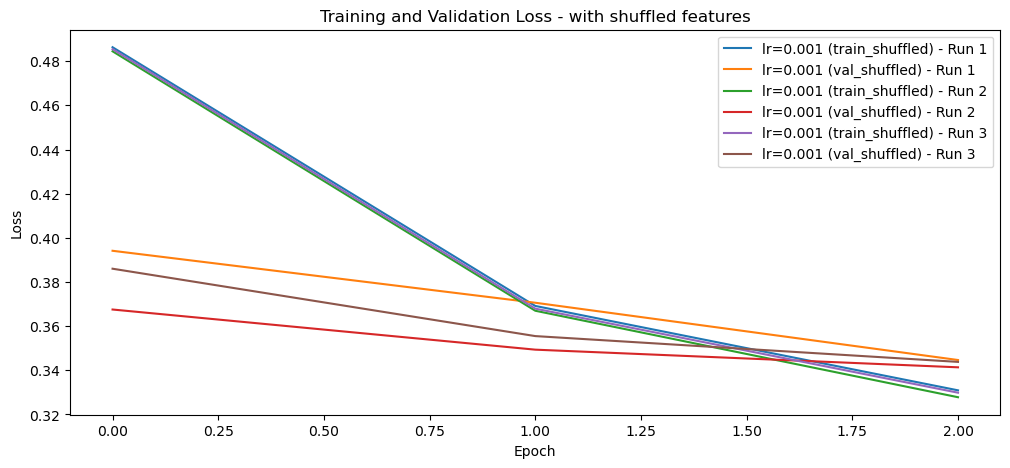

In [14]:
plt.figure(figsize=(12, 5))
for i, history in enumerate(histories_shuffled):
    plt.plot(history.history['loss'], label=f'lr={0.001} (train_shuffled) - Run {i+1}')
    plt.plot(history.history['val_loss'], label=f'lr={0.001} (val_shuffled) - Run {i+1}')
    
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss - with shuffled features')
plt.legend()
plt.show()

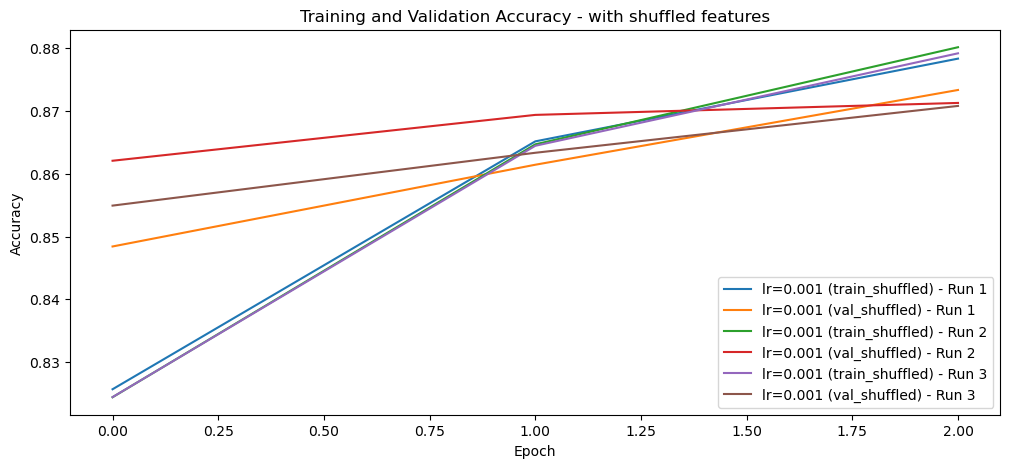

In [15]:
plt.figure(figsize=(12, 5))
for i, history in enumerate(histories_shuffled):
    plt.plot(history.history['accuracy'], label=f'lr={0.001} (train_shuffled) - Run {i+1}')
    plt.plot(history.history['val_accuracy'], label=f'lr={0.001} (val_shuffled) - Run {i+1}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy - with shuffled features')
plt.show()

In [16]:
# Training the model three times with fixed learning rate and three epochs each time - unshuffled features
hidden_layers = [64,128]
n_classes = 10
histories_unshuffled = []

for _ in range(3):
    model_unshuffled = get_model(hidden_layers=hidden_layers,
                      n_classes=n_classes)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model_unshuffled.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model_unshuffled.fit(x_train, y_train, epochs=3, validation_data=(x_val, y_val), verbose=1)
    histories_unshuffled.append(history)

Epoch 1/3
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.7875 - loss: 0.6053 - val_accuracy: 0.8573 - val_loss: 0.3700
Epoch 2/3
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8597 - loss: 0.3777 - val_accuracy: 0.8624 - val_loss: 0.3595
Epoch 3/3
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8762 - loss: 0.3329 - val_accuracy: 0.8754 - val_loss: 0.3398
Epoch 1/3
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.7856 - loss: 0.6069 - val_accuracy: 0.8524 - val_loss: 0.3836
Epoch 2/3
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8612 - loss: 0.3782 - val_accuracy: 0.8649 - val_loss: 0.3611
Epoch 3/3
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8776 - loss: 0.3336 - val_accuracy: 0.8737 - val_loss: 0.3387
Epoch 1/3
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7871 - loss: 0.5973 - val_accuracy: 0.8527 - val_loss: 0.3915
Epoch 2/3
1772/1772 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8596 - loss: 0.3797 -

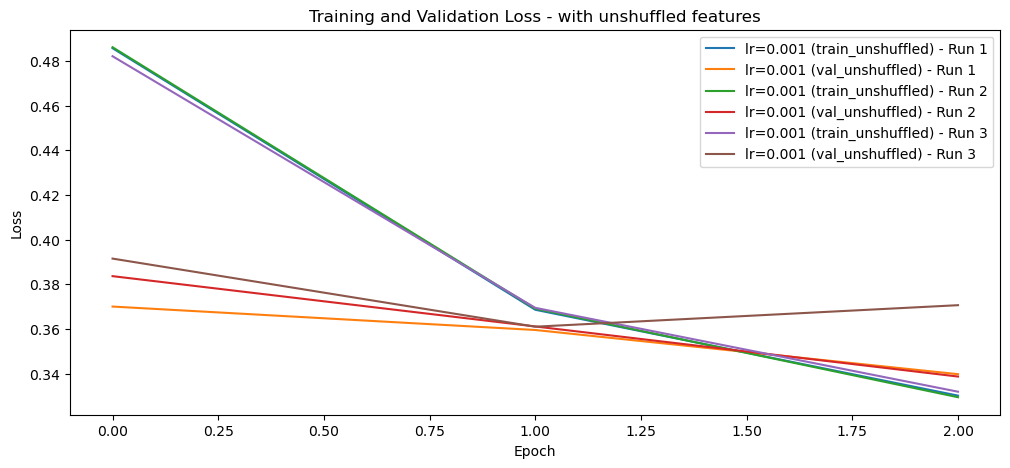

In [18]:
plt.figure(figsize=(12, 5))
for i, history in enumerate(histories_unshuffled):
    plt.plot(history.history['loss'], label=f'lr={0.001} (train_unshuffled) - Run {i+1}')
    plt.plot(history.history['val_loss'], label=f'lr={0.001} (val_unshuffled) - Run {i+1}')
    
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss - with unshuffled features')
plt.legend()
plt.show()

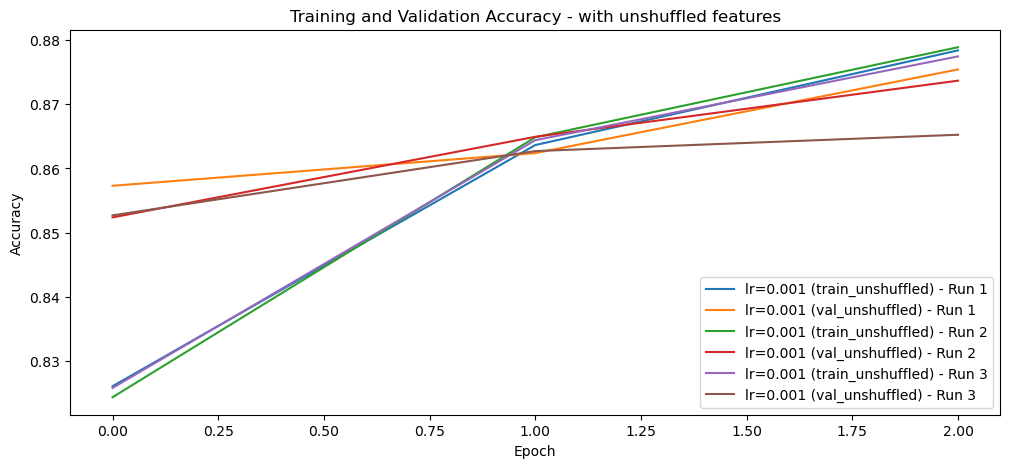

In [19]:
plt.figure(figsize=(12, 5))
for i, history in enumerate(histories_unshuffled):
    plt.plot(history.history['accuracy'], label=f'lr={0.001} (train_unshuffled) - Run {i+1}')
    plt.plot(history.history['val_accuracy'], label=f'lr={0.001} (val_unshuffled) - Run {i+1}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy - with unshuffled features')
plt.show()

# **3. Run inference**

Run inference in the test set and compute the metrics for testing.

In [20]:
test_loss_unshuffled, test_accuracy_unshuffled = model_unshuffled.evaluate(x_test, y_test)
print("Test Loss - unshuffled features:", test_loss_unshuffled)
print("Test Accuracy - unshuffled features:", test_accuracy_unshuffled)

test_loss_shuffled, test_accuracy_shuffled = model_shuffled.evaluate(x_test_shuffled, y_test_shuffled)
print("Test Loss - shuffled features:", test_loss_shuffled)
print("Test Accuracy - shuffled features:", test_accuracy_shuffled)

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8762 - loss: 0.3484
Test Loss - unshuffled features: 0.352672815322876
Test Accuracy - unshuffled features: 0.8745714426040649
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8835 - loss: 0.3301
Test Loss - shuffled features: 0.3329653739929199
Test Accuracy - shuffled features: 0.8812857270240784


Comments: We can see that the accuracy of shuffled data is ~88.13% which is comparitively higher than the unshuffled data, which is ~87.5%. 